<a href="https://colab.research.google.com/github/Ellisetr/Intelligent-Systems-and-Technologies/blob/main/%D0%98%D0%A1%D0%A2_1_2(%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%B5_%D0%B8%D0%B7_%D0%B8%D0%BD%D1%82%D0%B5%D1%80%D0%BD%D0%B5%D1%82%D0%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная 1-2
1. Применить для тестовых вариантов и вариантов из репозиториев различные алгоритмы поиска ассоциативных правил при одинаковых начальных
условиях (при одинаковых пороговых значениях для поддержки и достоверности) и сравнить полученные результаты. Для тестовых вариантов выполнить
ручные расчеты (например, с применением MS Excel) и расчеты с применением
программных библиотек на языке Python. Для вариантов из репозиториев выполнить расчеты с применением программных библиотек на языке Python.
В качестве алгоритмов поиска ассоциативных правил использовать алгоритмы:

*   Apriori;
*   Efficient Apriori;
*   FPGrowth.

2. Сформировать базы ассоциативных правил с уровнем минимальной достоверности 60% и 80%. Вычислить для ассоциативных правил поддержку, достоверность, значимость.
3. Оценить время формирования искомых ассоциативных правил с применением различных алгоритмов и построить диаграммы, позволяющие выполнить сравнительный анализ.
4. Выполнить визуализацию ассоциативных правил.

Установка и импорт библиотек

In [ ]:
%pip install --index-url https://test.pypi.org/simple/ PyARMViz
%pip install apriori_python
%pip install efficient-apriori
%pip install fpgrowth_py

import PyARMViz
import pandas as pd
import numpy as np
from apriori_python import apriori
from efficient_apriori import apriori as ef_apriori
from fpgrowth_py import fpgrowth
import time
import matplotlib.pyplot as plt

Looking in indexes: https://test.pypi.org/simple/, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.9 MB 7.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Открытие и получение df

In [ ]:
dataset = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx', usecols=['InvoiceNo', 'Description'])
dataset['Description'] = dataset['Description'].astype(str)
dataset

,InvoiceNo,Description
0,536365,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,WHITE METAL LANTERN
2,536365,CREAM CUPID HEARTS COAT HANGER
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,RED WOOLLY HOTTIE WHITE HEART.
...,...,...
541904,581587,PACK OF 20 SPACEBOY NAPKINS
541905,581587,CHILDREN'S APRON DOLLY GIRL
541906,581587,CHILDRENS CUTLERY DOLLY GIRL
541907,581587,CHILDRENS CUTLERY CIRCUS PARADE


Генерация списка транзакций

In [ ]:
transactions_b = []
current_transaction_num = None
current_positions = []
for i in range(dataset.shape[0]):
    transaction = dataset.loc[i]
    if transaction[0] != current_transaction_num:
        transactions_b.append(current_positions)
        current_transaction_num = transaction[0]
        current_positions = [transaction[1]]
    else:
        current_positions.append(transaction[1])
transactions_b.pop(0)
for i in range(10):
    print(transactions_b[i])

['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN', 'CREAM CUPID HEARTS COAT HANGER', 'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE WHITE HEART.', 'SET 7 BABUSHKA NESTING BOXES', 'GLASS STAR FROSTED T-LIGHT HOLDER']
['HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT']
['ASSORTED COLOUR BIRD ORNAMENT', "POPPY'S PLAYHOUSE BEDROOM ", "POPPY'S PLAYHOUSE KITCHEN", 'FELTCRAFT PRINCESS CHARLOTTE DOLL', 'IVORY KNITTED MUG COSY ', 'BOX OF 6 ASSORTED COLOUR TEASPOONS', 'BOX OF VINTAGE JIGSAW BLOCKS ', 'BOX OF VINTAGE ALPHABET BLOCKS', 'HOME BUILDING BLOCK WORD', 'LOVE BUILDING BLOCK WORD', 'RECIPE BOX WITH METAL HEART', 'DOORMAT NEW ENGLAND']
['JAM MAKING SET WITH JARS', 'RED COAT RACK PARIS FASHION', 'YELLOW COAT RACK PARIS FASHION', 'BLUE COAT RACK PARIS FASHION']
['BATH BUILDING BLOCK WORD']
['ALARM CLOCK BAKELIKE PINK', 'ALARM CLOCK BAKELIKE RED ', 'ALARM CLOCK BAKELIKE GREEN', 'PANDA AND BUNNIES STICKER SHEET', 'STARS GIFT TAPE ', 'INFLATABLE POLITICAL GLOBE ', 'VIN

Выполнение алгоритмов: Apriori, Efficient Apriori и FPGrowth с достоверностью 60%

In [ ]:
start = time.time()
freq_item_set, rules = apriori(transactions_b, minSup = 0.02, minConf = 0.6)
for r in rules:
    print(r)
end = time.time()
time_apriori_60 = end - start
print(f'Time is {time_apriori_60}')

[{'GREEN REGENCY TEACUP AND SAUCER'}, {'PINK REGENCY TEACUP AND SAUCER'}, 0.609271523178808]
[{'JUMBO STORAGE BAG SUKI'}, {'JUMBO BAG RED RETROSPOT'}, 0.6103247293921732]
[{'JUMBO BAG WOODLAND ANIMALS'}, {'JUMBO BAG RED RETROSPOT'}, 0.6169724770642202]
[{'DOLLY GIRL LUNCH BOX'}, {'SPACEBOY LUNCH BOX '}, 0.6255813953488372]
[{'JUMBO  BAG BAROQUE BLACK WHITE'}, {'JUMBO BAG RED RETROSPOT'}, 0.6261879619852164]
[{'ALARM CLOCK BAKELIKE GREEN'}, {'ALARM CLOCK BAKELIKE RED '}, 0.645]
[{'JUMBO BAG STRAWBERRY'}, {'JUMBO BAG RED RETROSPOT'}, 0.6503579952267303]
[{'PAPER CHAIN KIT VINTAGE CHRISTMAS'}, {"PAPER CHAIN KIT 50'S CHRISTMAS "}, 0.6670673076923077]
[{'JUMBO BAG PINK POLKADOT'}, {'JUMBO BAG RED RETROSPOT'}, 0.6766856214459789]
[{'PINK REGENCY TEACUP AND SAUCER'}, {'GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER '}, 0.6853932584269663]
[{'CHARLOTTE BAG PINK POLKADOT'}, {'RED RETROSPOT CHARLOTTE BAG'}, 0.6921052631578948]
[{'ROSES REGENCY TEACUP AND SAUCER '}, {'GREEN RE

In [ ]:
start = time.time()
freq_item_set, rules = ef_apriori(transactions_b, min_support = 0.02, min_confidence = 0.6)
PyARMViz.generate_rule_graph_plotly(rules)
end = time.time()
time_ef_apr_60 = end - start
print(f'Time is {time_ef_apr_60}')

Time is 1.2387535572052002


In [ ]:
rules_rhs = filter(lambda rule: len(rule.lhs) == 1 and len(rule.rhs) == 1, rules)
for rule in sorted(rules_rhs, key=lambda rule: rule.lift):
  print(rule)
rules_rhs = filter(lambda rule: len(rule.lhs) == 2 and len(rule.rhs) == 1, rules)
for rule in sorted(rules_rhs, key=lambda rule: rule.lift):
  print(rule)

{JUMBO STORAGE BAG SUKI} -> {JUMBO BAG RED RETROSPOT} (conf: 0.610, supp: 0.028, lift: 7.404, conv: 2.355)
{JUMBO BAG WOODLAND ANIMALS} -> {JUMBO BAG RED RETROSPOT} (conf: 0.617, supp: 0.021, lift: 7.485, conv: 2.396)
{JUMBO  BAG BAROQUE BLACK WHITE} -> {JUMBO BAG RED RETROSPOT} (conf: 0.626, supp: 0.023, lift: 7.596, conv: 2.455)
{JUMBO BAG STRAWBERRY} -> {JUMBO BAG RED RETROSPOT} (conf: 0.650, supp: 0.021, lift: 7.890, conv: 2.624)
{JUMBO BAG PINK POLKADOT} -> {JUMBO BAG RED RETROSPOT} (conf: 0.677, supp: 0.032, lift: 8.209, conv: 2.838)
{PAPER CHAIN KIT VINTAGE CHRISTMAS} -> {PAPER CHAIN KIT 50'S CHRISTMAS } (conf: 0.667, supp: 0.021, lift: 14.767, conv: 2.868)
{ALARM CLOCK BAKELIKE GREEN} -> {ALARM CLOCK BAKELIKE RED } (conf: 0.645, supp: 0.025, lift: 15.468, conv: 2.699)
{CHARLOTTE BAG PINK POLKADOT} -> {RED RETROSPOT CHARLOTTE BAG} (conf: 0.692, supp: 0.020, lift: 17.072, conv: 3.116)
{ROSES REGENCY TEACUP AND SAUCER } -> {GREEN REGENCY TEACUP AND SAUCER} (conf: 0.700, supp: 0.03

In [ ]:
start = time.time()
freq_items_set, rules = fpgrowth(transactions_b, minSupRatio=0.02, minConf=0.6)
rules_set = []
for r in rules:
    if r not in rules_set:
        rules_set.append(r)
for r in rules_set:
    print(r)
end = time.time()
time_fpg_60 = end - start
print(f'Time is {time_fpg_60}')

[{'RED HANGING HEART T-LIGHT HOLDER'}, {'WHITE HANGING HEART T-LIGHT HOLDER'}, 0.6631299734748011]
[{'CHARLOTTE BAG PINK POLKADOT'}, {'RED RETROSPOT CHARLOTTE BAG'}, 0.6921052631578948]
[{'GARDENERS KNEELING PAD CUP OF TEA '}, {'GARDENERS KNEELING PAD KEEP CALM '}, 0.7176470588235294]
[{'PINK REGENCY TEACUP AND SAUCER'}, {'ROSES REGENCY TEACUP AND SAUCER '}, 0.766541822721598]
[{'PINK REGENCY TEACUP AND SAUCER'}, {'GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER '}, 0.6853932584269663]
[{'GREEN REGENCY TEACUP AND SAUCER', 'PINK REGENCY TEACUP AND SAUCER'}, {'ROSES REGENCY TEACUP AND SAUCER '}, 0.8524844720496895]
[{'GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER '}, {'PINK REGENCY TEACUP AND SAUCER'}, 0.7002551020408163]
[{'PINK REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER '}, {'GREEN REGENCY TEACUP AND SAUCER'}, 0.8941368078175895]
[{'GREEN REGENCY TEACUP AND SAUCER'}, {'PINK REGENCY TEACUP AND SAUCER'}, 0.609271523178808]
[{'PINK

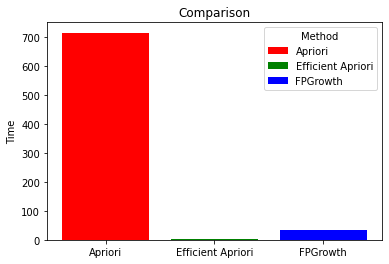

In [ ]:
fig, ax = plt.subplots()

ax.bar('Apriori',time_apriori_60, label="Apriori", color='r')
ax.bar('Efficient Apriori',time_ef_apr_60, label="Efficient Apriori", color='g')
ax.bar('FPGrowth',time_fpg_60, label="FPGrowth", color='b')

ax.set_ylabel('Time')
ax.set_title('Comparison')
ax.legend(title='Method')

plt.show()

Выполнение алгоритмов: Apriori, Efficient Apriori и FPGrowth с достоверностью 80%

In [ ]:
start = time.time()
freq_item_set, rules = apriori(transactions_b, minSup = 0.02, minConf = 0.8)
for r in rules:
    print(r)
end = time.time()
time_apriori_80 = end - start
print(f'Time is {time_apriori_80}')

[{'PINK REGENCY TEACUP AND SAUCER'}, {'GREEN REGENCY TEACUP AND SAUCER'}, 0.8039950062421972]
[{'GREEN REGENCY TEACUP AND SAUCER', 'PINK REGENCY TEACUP AND SAUCER'}, {'ROSES REGENCY TEACUP AND SAUCER '}, 0.8524844720496895]
[{'PINK REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER '}, {'GREEN REGENCY TEACUP AND SAUCER'}, 0.8941368078175895]
Time is 711.6560328006744


In [ ]:
start = time.time()
freq_item_set, rules = ef_apriori(transactions_b, min_support = 0.02, min_confidence = 0.8)
PyARMViz.generate_rule_graph_plotly(rules)
end = time.time()
time_ef_apr_80 = end - start
print(f'Time is {time_ef_apr_80}')

Time is 0.8660614490509033


In [ ]:
rules_rhs = filter(lambda rule: len(rule.lhs) == 1 and len(rule.rhs) == 1, rules)
for rule in sorted(rules_rhs, key=lambda rule: rule.lift):
  print(rule)
rules_rhs = filter(lambda rule: len(rule.lhs) == 2 and len(rule.rhs) == 1, rules)
for rule in sorted(rules_rhs, key=lambda rule: rule.lift):
  print(rule)

{PINK REGENCY TEACUP AND SAUCER} -> {GREEN REGENCY TEACUP AND SAUCER} (conf: 0.804, supp: 0.025, lift: 19.701, conv: 4.894)
{GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY TEACUP AND SAUCER} -> {ROSES REGENCY TEACUP AND SAUCER } (conf: 0.852, supp: 0.021, lift: 19.714, conv: 6.486)
{PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER } -> {GREEN REGENCY TEACUP AND SAUCER} (conf: 0.894, supp: 0.021, lift: 21.909, conv: 9.061)


In [ ]:
start = time.time()
freq_items_set, rules = fpgrowth(transactions_b, minSupRatio=0.02, minConf=0.8)
rules_set = []
for r in rules:
    if r not in rules_set:
        rules_set.append(r)
for r in rules_set:
    print(r)
end = time.time()
time_fpg_80 = end - start
print(f'Time is {time_fpg_80}')

[{'GREEN REGENCY TEACUP AND SAUCER', 'PINK REGENCY TEACUP AND SAUCER'}, {'ROSES REGENCY TEACUP AND SAUCER '}, 0.8524844720496895]
[{'PINK REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER '}, {'GREEN REGENCY TEACUP AND SAUCER'}, 0.8941368078175895]
[{'PINK REGENCY TEACUP AND SAUCER'}, {'GREEN REGENCY TEACUP AND SAUCER'}, 0.8039950062421972]
Time is 33.64589977264404


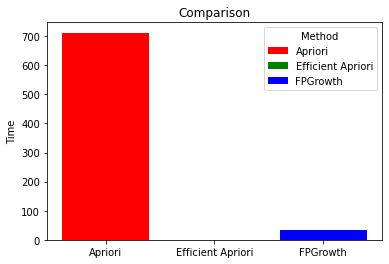

In [ ]:
fig, ax = plt.subplots()

ax.bar('Apriori',time_apriori_80, label="Apriori", color='r')
ax.bar('Efficient Apriori',time_ef_apr_80, label="Efficient Apriori", color='g')
ax.bar('FPGrowth',time_fpg_80, label="FPGrowth", color='b')

ax.set_ylabel('Time')
ax.set_title('Comparison')
ax.legend(title='Method')

plt.show()